In [ ]:
chatgpt1_link = ""
chatgpt2_link = ""
bing1_link = ""
bing2_link = ""
bard1_link = ""
bard2_link = ""

In [ ]:
df_chatgpt1 = pd.read_csv(chatgpt1_link)
df_chatgpt2 = pd.read_csv(chatgpt2_link)
df_bing1 = pd.read_csv(bing1_link)
df_bing2 = pd.read_csv(bing2_link)
df_bard1 = pd.read_csv(bard1_link)
df_bard2 = pd.read_csv(bard2_link)

df_chatgpt1['chatgpt2'] = df_chatgpt2['chatgpt2']
df_chatgpt1['bing1'] = df_bing1['bing1']
df_chatgpt1['bing2'] = df_bing2['bing2']
df_chatgpt1['bard1'] = df_bard1['bard1']
df_chatgpt1['bard2'] = df_bard2['bard2']

In [ ]:
df_chatgpt1.to_csv('dataset.csv', index=False)

from google.colab import files
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

model_link_mapping = {
    'chatgpt1': chatgpt1_link,
    'chatgpt2': chatgpt2_link,
    'bing1': bing1_link,
    'bing2': bing2_link,
    'bard1': bard1_link,
    'bard2': bard2_link,
}

choosen = 'chatgpt1' # Change this
df = pd.read_csv(model_link_mapping[choosen])

In [ ]:
# Calculate the mean length of sentences in words
mean_word_count = df['reference'].apply(lambda x: len(x.split())).mean()

# Calculate the mean length of sentences in characters
mean_char_count = df['reference'].apply(lambda x: len(x)).mean()

# Display the mean values
print("Mean Word Count:", mean_word_count)
print("Mean Character Count:", mean_char_count)

Mean Word Count: 15.2436
Mean Character Count: 103.0588


In [ ]:
# Loop through the dictionary and print model names and links
for model, link in model_link_mapping.items():

  df = pd.read_csv(link)

  # Calculate the mean length of sentences in words
  mean_word_count = df[model].apply(lambda x: len(x.split())).mean()

  # Calculate the mean length of sentences in characters
  mean_char_count = df[model].apply(lambda x: len(x)).mean()

  # Display the mean values
  print(f"{model} Mean Word Count: {mean_word_count}")
  print(f"{model} Mean Character Count: {mean_char_count}\n\n")


chatgpt1 Mean Word Count: 17.265
chatgpt1 Mean Character Count: 119.4754


chatgpt2 Mean Word Count: 18.3396
chatgpt2 Mean Character Count: 128.6018


bing1 Mean Word Count: 15.505
bing1 Mean Character Count: 101.9518


bing2 Mean Word Count: 15.734
bing2 Mean Character Count: 102.9176


bard1 Mean Word Count: 14.5068
bard1 Mean Character Count: 93.1614


bard2 Mean Word Count: 15.5516
bard2 Mean Character Count: 99.5322




In [ ]:
import pandas as pd

sheet_url = ""

# Read the Google Sheet data into a Pandas DataFrame
df = pd.read_csv(sheet_url)

In [ ]:
# Assuming you have a DataFrame named 'df' and a column named 'Subtopic'
count = df['Subtopic'].value_counts(sort=False)

# Sort the counts based on the order of appearance
count_sorted = count.reindex(df['Subtopic'].unique())

# Display the sorted count
print("Count:\n", count_sorted)

Count:
 same as the 1st topic         66
contract                     189
legislation                  100
court cases                  145
business proposal            100
meeting minutes              100
memos                        100
press releases               100
agreement                    100
same as the 2nd topic        100
physics                      100
chemistry                    100
biology                      100
computer science             100
tech                         100
psychology                   100
blog post                    100
news                         100
AI                           100
health                        69
nutrition                     99
exercise                     100
mental health                100
chronic diseases             100
infectious diseases          100
patient's medical history    100
patient's complaint           54
complaintB                    90
symptoms and treatments       88
good habits                  100
fa

# BERTScore

In [ ]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import bert_score

# Load data from sheet in Google Drive
df = pd.read_csv(model_link_mapping[choosen])

# Extract original and paraphrased sentences
original_sentences = df['reference'].tolist()
paraphrased_sentences = df[choosen].tolist() # Select the model

In [ ]:
# Compute BERTScore for each pair of original and paraphrased sentences
P, R, F1 = bert_score.score(original_sentences, paraphrased_sentences, lang="en", model_type='microsoft/deberta-xlarge-mnli', verbose=True)

Some weights of the model checkpoint at microsoft/deberta-xlarge-mnli were not used when initializing DebertaModel: ['pooler.dense.weight', 'classifier.weight', 'classifier.bias', 'pooler.dense.bias']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/156 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/79 [00:00<?, ?it/s]

done in 109.27 seconds, 45.76 sentences/sec


In [ ]:
# ChatGPT 1
F1.mean()

tensor(0.9227)

In [ ]:
# ChatGPT 2
F1.mean()

tensor(0.8922)

In [ ]:
# Bing 1
F1.mean()

tensor(0.9383)

In [ ]:
# Bing 2
F1.mean()

tensor(0.9296)

In [ ]:
# Bard 1
F1.mean()

tensor(0.9077)

In [ ]:
# Bard 2
F1.mean()

tensor(0.8955)

In [ ]:
P_list = [round(num, 4) for num in P.tolist()]
R_list = [round(num, 4) for num in R.tolist()]
F1_list = [round(num, 4) for num in F1.tolist()]

for i, val in enumerate(F1_list):
  df.loc[i, "bertscore_p"] = P_list[i]
  df.loc[i, "bertscore_r"] = R_list[i]
  df.loc[i, "bertscore_f1"] = F1_list[i]

In [ ]:
# Extract the desired columns into a new dataframe
# df_selected = df[['id', 'reference', 't5_0', 'bertscore_p', 'bertscore_r', 'bertscore_f1', 'bertscore_p_rescale', 'bertscore_r_rescale', 'bertscore_f1_rescale']]

# Export the selected columns to a CSV file
# df_selected.to_csv('t5_bertscore_deberta-xlarge-mnli.csv', index=False)
file_name = f"{choosen}_bertscore.csv"

df.to_csv(file_name, index=False)

from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

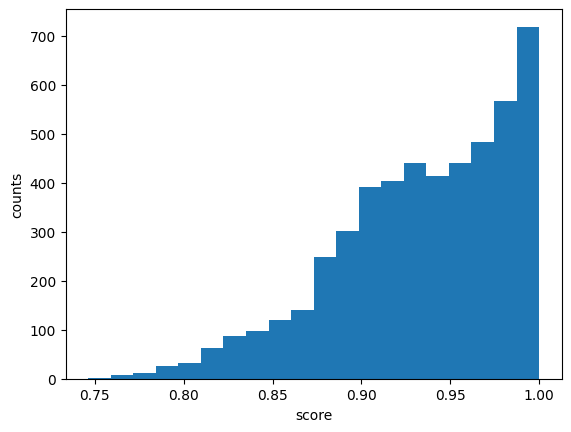

In [ ]:
# with rescale roberta-large
plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

# STSB and CoLA with T5

In [ ]:
import pandas as pd

models_name = ['chatgpt1', 'chatgpt2', 'bing1', 'bing2', 'bard1', 'bard2']
df = pd.read_csv('')

In [ ]:
df

,reference,chatgpt1,chatgpt2,bing1,bing2,bard1,bard2
0,Legal documents are written texts that pertain...,Legal texts are written materials that relate ...,Textual compositions relating to the law are r...,Legal documents are written materials that rel...,Written texts that relate to the law are legal...,Legal documents are written texts about law.,Legal documents are written texts that deal wi...
1,Government documents refer to written records ...,Governmental records are written documents gen...,Written records generated by governmental enti...,Government documents are written records produ...,Written materials produced by governmental bod...,Government documents are written records from ...,Government documents are written records produ...
2,Business documents encompass written materials...,Business papers encompass written materials th...,Written materials concerning commercial activi...,Business documents are written materials that ...,Written content relevant to commercial activit...,Business documents are written materials about...,Business documents are written materials that ...
3,Legal papers are textual records with a focus ...,Textual records in the legal domain primarily ...,Textual records primarily concerned with legal...,Legal papers are textual records that focus on...,Textual records with a legal focus are legal p...,Legal papers are textual records about legal m...,Legal papers are textual records that focus on...
4,Official documents from the government are wri...,Official written materials issued by governmen...,Written materials originating from governmenta...,Official documents from the government are wri...,Written records originating from governmental ...,Official government documents are written mate...,Official documents from the government are wri...
...,...,...,...,...,...,...,...
4995,The customer support team exhibited a lack of ...,The customer support team lacked empathy and f...,The customer support team showed a lack of emp...,The customer support team did not show empathy...,The customer support team showed a lack of emp...,Customer support did not care about my problem...,The customer support team was uncaring and une...
4996,The movie's visual effects were outdated and p...,The movie's visual effects were outdated and p...,The movie's visual effects appeared outdated a...,The movie's visual effects were outdated and b...,The movie's visual effects were outdated and b...,The movie's special effects were not good and ...,The movie's visual effects were outdated and p...
4997,I encountered difficulties in canceling my sub...,I encountered difficulties in canceling my sub...,I faced obstacles when attempting to cancel my...,I had difficulties canceling my subscription o...,I faced challenges in canceling my subscriptio...,I could not cancel my subscription or membersh...,I had difficulty canceling my subscription or ...
4998,The acting in the film was unconvincing and la...,The acting in the film was unconvincing and la...,The acting in the film lacked conviction and e...,The performers in the film were unconvincing a...,The acting in the film was unauthentic and lac...,The acting in the movie was not believable and...,The acting in the film was unconvincing and la...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
!pip3 install torch
!pip3 install transformers
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.2 MB/s eta 0:00:00


In [ ]:
from transformers import T5ForConditionalGeneration,T5Tokenizer
import torch
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# def set_seed(seed):
#   torch.manual_seed(seed)
#   if torch.cuda.is_available():
#     torch.cuda.manual_seed_all(seed)

# set_seed(42)

model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

In [ ]:
device = "cuda:0"
model = model.to(device)

In [ ]:
def similarity(x):
    input_ids = tokenizer.encode(str(x), return_tensors='pt', max_length=512)
    input_ids = input_ids.to(device)
    outputs = model.generate(input_ids=input_ids)
    similarityd = tokenizer.decode(outputs[0])
    return similarityd
def cola(y):
    input_ids = tokenizer.encode(str(y), return_tensors='pt')
    input_ids = input_ids.to(device)
    outputs = model.generate(input_ids=input_ids)
    colad = tokenizer.decode(outputs[0])
    return colad

In [ ]:
for model_name in models_name:

  df[f"cola_sen_{model_name}"] = 'cola sentence: ' + df[model_name] + ' '

  for i, ref in df[f'cola_sen_{model_name}'].items():
    df.at[i, f'cola_{model_name}'] = cola(ref)
    # break

In [ ]:
count = df['cola_ref'].value_counts()

# Display the count
print("Count:", count)

Count: <pad> acceptable</s>      4967
<pad> unacceptable</s>      33
Name: cola_ref, dtype: int64


In [ ]:
df['column'] = df['Type'].str.split(' ').str[-2].str.strip('</s>')

In [ ]:
for name in models_name:

  count = df[f'cola_{name}'].value_counts()

  # Display the count
  print(f"\n{name} Count:", count)


chatgpt1 Count: <pad> acceptable</s>      4994
<pad> unacceptable</s>       6
Name: cola_chatgpt1, dtype: int64

chatgpt2 Count: <pad> acceptable</s>      4990
<pad> unacceptable</s>      10
Name: cola_chatgpt2, dtype: int64

bing1 Count: <pad> acceptable</s>      4986
<pad> unacceptable</s>      14
Name: cola_bing1, dtype: int64

bing2 Count: <pad> acceptable</s>      4968
<pad> unacceptable</s>      32
Name: cola_bing2, dtype: int64

bard1 Count: <pad> acceptable</s>      4982
<pad> unacceptable</s>      18
Name: cola_bard1, dtype: int64

bard2 Count: <pad> acceptable</s>      4990
<pad> unacceptable</s>      10
Name: cola_bard2, dtype: int64


In [ ]:
df

,reference,chatgpt1,cola_sen,cola_ref
0,Legal documents are written texts that pertain...,Legal texts are written materials that relate ...,cola sentence: Legal documents are written tex...,<pad> acceptable</s>
1,Government documents refer to written records ...,Governmental records are written documents gen...,cola sentence: Government documents refer to w...,<pad> acceptable</s>
2,Business documents encompass written materials...,Business papers encompass written materials th...,cola sentence: Business documents encompass wr...,<pad> acceptable</s>
3,Legal papers are textual records with a focus ...,Textual records in the legal domain primarily ...,cola sentence: Legal papers are textual record...,<pad> acceptable</s>
4,Official documents from the government are wri...,Official written materials issued by governmen...,cola sentence: Official documents from the gov...,<pad> acceptable</s>
...,...,...,...,...
4995,The customer support team exhibited a lack of ...,The customer support team lacked empathy and f...,cola sentence: The customer support team exhib...,<pad> acceptable</s>
4996,The movie's visual effects were outdated and p...,The movie's visual effects were outdated and p...,cola sentence: The movie's visual effects were...,<pad> acceptable</s>
4997,I encountered difficulties in canceling my sub...,I encountered difficulties in canceling my sub...,cola sentence: I encountered difficulties in c...,<pad> acceptable</s>
4998,The acting in the film was unconvincing and la...,The acting in the film was unconvincing and la...,cola sentence: The acting in the film was unco...,<pad> acceptable</s>


In [ ]:
# Extract the desired columns into a new dataframe
df_selected = df[['reference', 'cola_chatgpt1', 'cola_chatgpt2', 'cola_bing1', 'cola_bing2', 'cola_bard1', 'cola_bard2']]

# Export the selected columns to a CSV file
df_selected.to_csv('cola_scores.csv', index=False)

from google.colab import files
files.download('cola_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re

for name in models_name:
  for i, ref in df["reference"].items():
    sentence_1 = ref
    sentence_2 = df.loc[i, name]
    similarity_check = f"stsb sentence1:{sentence_1} sentence2:{sentence_2}"

    similarity_values = similarity(similarity_check)

    match = re.findall(r'\d+\.\d+', similarity_values)
    number = float(match[0]) if match else None

    df.loc[i, f'stsb_{name}'] = number

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
# Extract the desired columns into a new dataframe
df_selected = df[['reference', 'stsb_chatgpt1', 'stsb_chatgpt2', 'stsb_bing1', 'stsb_bing2', 'stsb_bard1', 'stsb_bard2']]

# Export the selected columns to a CSV file
df_selected.to_csv('stsb_scores.csv', index=False)

from google.colab import files
files.download('stsb_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(round(df['stsb_chatgpt1'].mean(),4))
print(round(df['stsb_chatgpt2'].mean(), 4))
print(round(df['stsb_bing1'].mean(), 4))
print(round(df['stsb_bing2'].mean(), 4))
print(round(df['stsb_bard1'].mean(), 4))
print(round(df['stsb_bard2'].mean(), 4))

4.7895
4.7248
4.8415
4.8116
4.5121
4.4092


In [ ]:
# Extract the desired columns into a new dataframe
# df_selected = df[['id', 'reference', 't5_0', 'stsb']]

# Export the selected columns to a CSV file
df.to_csv(f'{choosen}_stsb_scores.csv', index=False)

from google.colab import files
files.download(f'{choosen}_stsb_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ChatGPT 1 - t5-large
df['stsb'].mean()

4.812239999999999

In [ ]:
# ChatGPT 2 - t5-large
df['stsb'].mean()

4.733439999999999

In [ ]:
# Bing 1 - t5-large
df['stsb'].mean()

4.88972

In [ ]:
# Bing 2 - t5-large
df['stsb'].mean()

4.88728

In [ ]:
# Bard 1 - t5-large
df['stsb'].mean()

4.603

In [ ]:
# Bard 2 - t5-large
df['stsb'].mean()

4.50328

# ROUGE

In [ ]:
!pip install evaluate
!pip install rouge_score

In [ ]:
import evaluate
import pandas as pd

In [ ]:
rouge = evaluate.load("rouge")

for i, ref in df["reference"].items():
  references = [ref]
  predictions = [df.at[i, choosen]]

  score = rouge.compute(predictions=predictions, references=references)

  df.loc[i, 'rouge1'] = round(score['rouge1'], 4)
  df.loc[i, 'rouge2'] = round(score['rouge2'], 4)
  df.loc[i, 'rougeL'] = round(score['rougeL'], 4)

In [ ]:
# Extract the desired columns into a new dataframe
# df_selected = df[['id', 'reference', 't5_0', 'rouge1-p', 'rouge1-r', 'rouge1-f', 'rouge2-p', 'rouge2-r', 'rouge2-f', 'rougeL-p', 'rougeL-r', 'rougeL-f']]

# Export the selected columns to a CSV file
df.to_csv(f'{choosen}_rouge_scores.csv', index=False)

from google.colab import files
files.download(f'{choosen}_rouge_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ChatGPT 1
print(df['rouge1'].mean())
print(df['rouge2'].mean())
print(df['rougeL'].mean())

0.72976588
0.51930958
0.67256394


In [ ]:
print(df['rouge1'].mean())
print(df['rouge2'].mean())
print(df['rougeL'].mean())

0.64183916
0.39879008
0.5623001200000001


In [ ]:
# Bing 1
print(df['rouge1'].mean())
print(df['rouge2'].mean())
print(df['rougeL'].mean())

0.8023111399999999
0.64029344
0.73448816


In [ ]:
# Bing 2
print(df['rouge1'].mean())
print(df['rouge2'].mean())
print(df['rougeL'].mean())

0.7655232
0.5701292800000001
0.67533336


In [ ]:
# Bard 1
print(df['rouge1'].mean())
print(df['rouge2'].mean())
print(df['rougeL'].mean())

0.7075987
0.5490243
0.6792464


In [ ]:
# Bard 2
print(df['rouge1'].mean())
print(df['rouge2'].mean())
print(df['rougeL'].mean())

0.68369174
0.5182137200000001
0.63771256


# BLEU

In [ ]:
bleu = evaluate.load("bleu")

for i, ref in df["reference"].items():
  references = ref
  predictions = df.loc[i, choosen]

  result = bleu.compute(predictions=[predictions], references=[references])

  df.loc[i, 'bleu'] = round(result['bleu'], 4)
  df.loc[i, 'brevity_penalty'] = round(result['brevity_penalty'], 4)

In [ ]:
# Extract the desired columns into a new dataframe
df_selected = df[['reference', choosen, 'bleu', 'brevity_penalty']]

# Export the selected columns to a CSV file
df_selected.to_csv(f'{choosen}_bleu_scores.csv', index=False)

from google.colab import files
files.download(f'{choosen}_bleu_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['bleu'].mean()

0.38500794

In [ ]:
df['bleu'].mean()

0.24424038

In [ ]:
df['bleu'].mean()

0.52425612

In [ ]:
df['bleu'].mean()

0.4351682200000001

In [ ]:
# Bard 1
df['bleu'].mean()

0.42681974

In [ ]:
# Bard 2
df['bleu'].mean()

0.38081615999999996

# GLEU

In [ ]:
google_bleu = evaluate.load("google_bleu")

for i, ref in df["reference"].items():
  references = ref
  predictions = df.loc[i, choosen]

  result = google_bleu.compute(predictions=[predictions], references=[[references]])

  df.loc[i, 'google_bleu'] = round(result['google_bleu'], 4)

In [ ]:
# Extract the desired columns into a new dataframe
df_selected = df[['reference', choosen, 'google_bleu']]

# Export the selected columns to a CSV file
df_selected.to_csv(f'{choosen}_gleu_scores.csv', index=False)

from google.colab import files
files.download(f'{choosen}_gleu_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['google_bleu'].mean()

0.4559161

In [ ]:
df['google_bleu'].mean()

0.3361579

In [ ]:
df['google_bleu'].mean()

0.5736822

In [ ]:
df['google_bleu'].mean()

0.50440786

In [ ]:
# Bard 1
df['google_bleu'].mean()

0.48480698

In [ ]:
# Bard 2
df['google_bleu'].mean()

0.44548456

# METEOR

In [ ]:
meteor = evaluate.load("meteor")

for i, ref in df["reference"].items():
  references = ref
  predictions = df.loc[i, choosen]

  result = meteor.compute(predictions=[predictions], references=[references])

  df.loc[i, 'meteor'] = round(result['meteor'], 4)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Extract the desired columns into a new dataframe
df_selected = df[['reference', choosen, 'meteor']]

# Export the selected columns to a CSV file
df_selected.to_csv(f'{choosen}_meteor_scores.csv', index=False)

from google.colab import files
files.download(f'{choosen}_meteor_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['meteor'].mean()

0.77548556

In [ ]:
df['meteor'].mean()

0.6889622400000001

In [ ]:
df['meteor'].mean()

0.82079886

In [ ]:
df['meteor'].mean()

0.78171024

In [ ]:
# Bard 1
df['meteor'].mean()

0.71515628

In [ ]:
# Bard 2
df['meteor'].mean()

0.69805674